<a href="https://colab.research.google.com/github/Akshara-j8/AIML-COURSE-IITH/blob/main/AIML_Module_01_Lab_01_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install wikipedia
import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=935ba7a1d41d18f32c7c4f80b7145904e39ecd8d240162b9b935ef0c036b505c
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
Successfully built wikipedia


In [3]:
topic1 = 'Giraffe'
topic2 = 'Elephant'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('fr')

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

In [4]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [5]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [6]:
print(eng1)

thegiraffeisalargeafricanhoofedmammalbelongingtothegenusgiraffaitisthetallestlivingterrestrialanimalandthelargestruminantonearthtraditionallygiraffeshavebeenthoughtofasonespeciesgiraffacamelopardaliswithninesubspeciesmostrecentlyresearchersproposeddividingthemintofourextantspeciesduetonewresearchintotheirmitochondrialandnucleardnaandindividualspeciescanbedistinguishedbytheirfurcoatpatternssixvalidextinctspeciesofgiraffafromafricaandpakistanareknownfromthefossilrecordthegiraffesdistinguishingcharacteristicsareitsextremelylongneckandlegshornlikeossiconesandspottedcoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostothergroundbasedherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupon

In [7]:
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

def key2string(keys):
  return [tuple2string(i) for i in keys]

def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

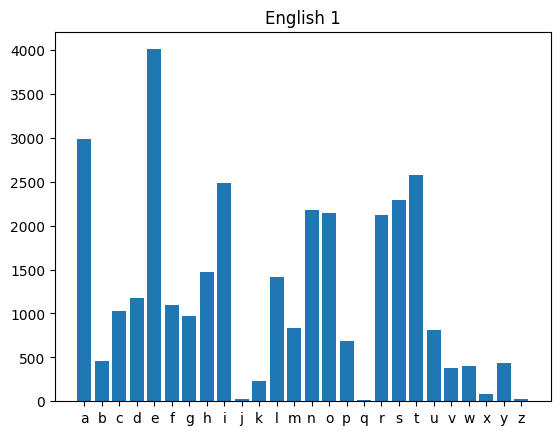

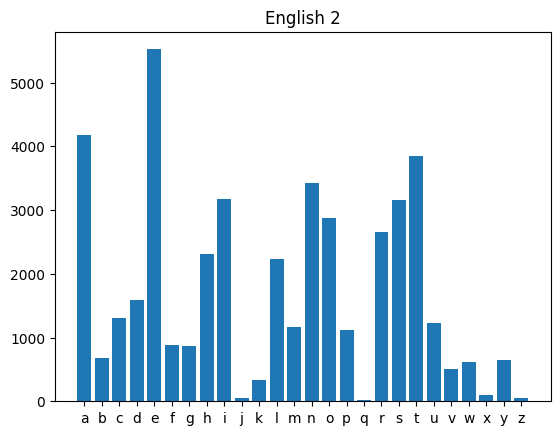

In [8]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

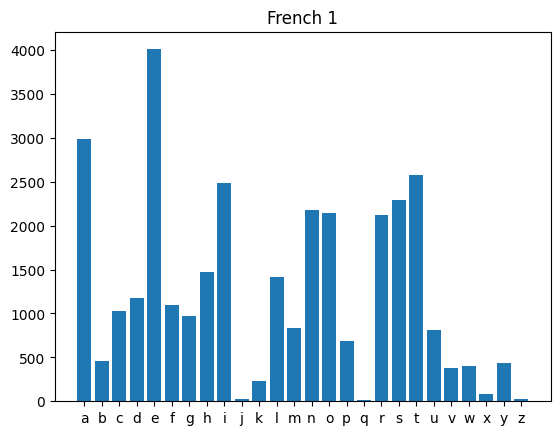

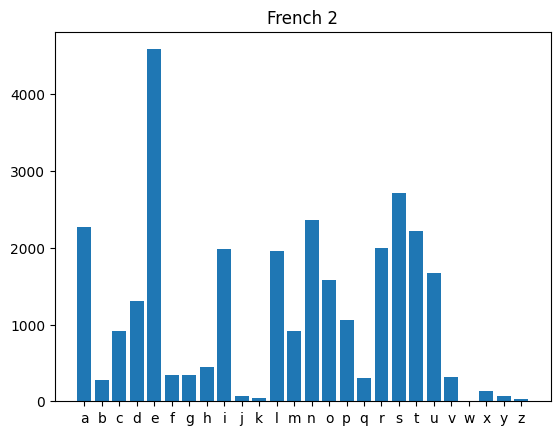

In [9]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

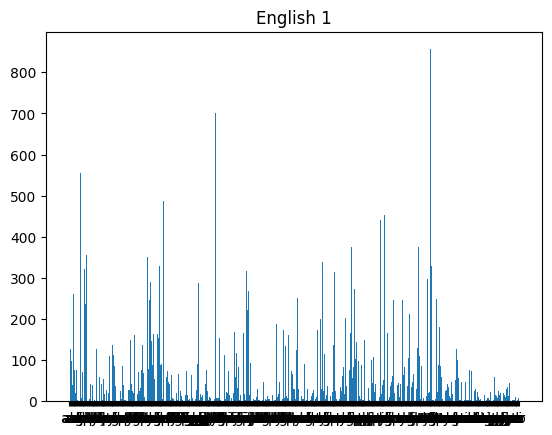

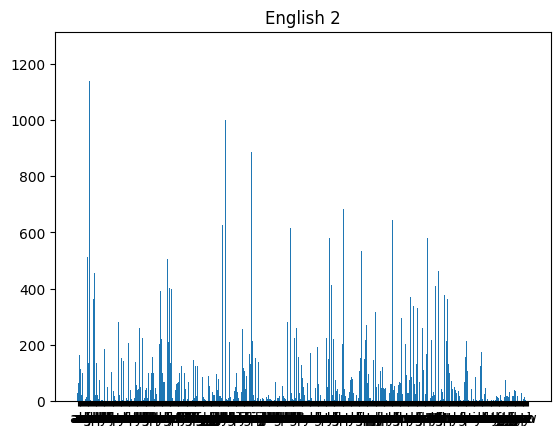

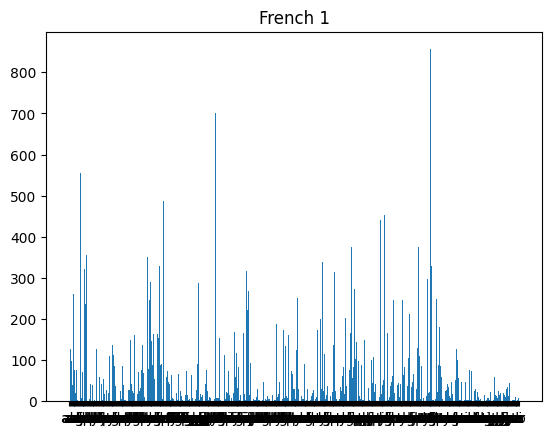

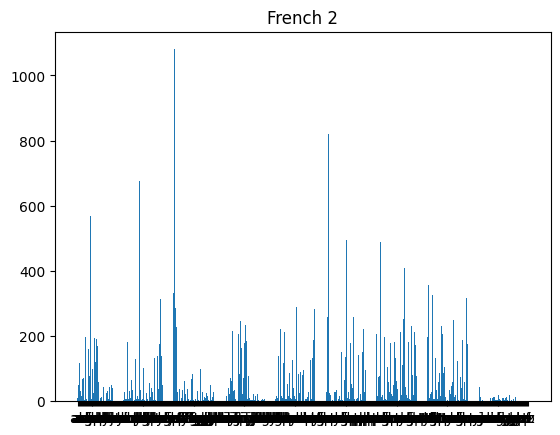

In [10]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

In [11]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

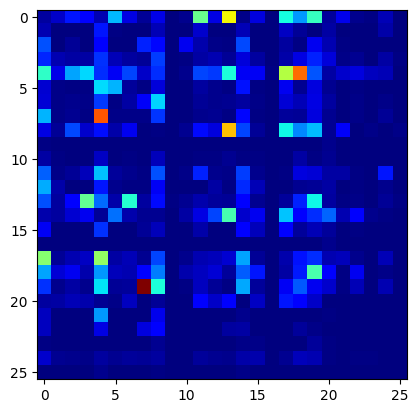

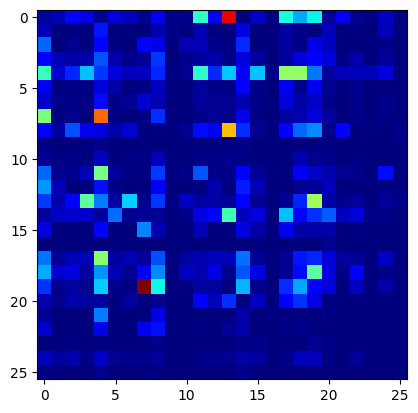

In [12]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

In [15]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [16]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

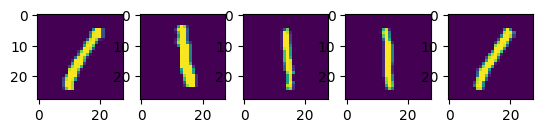

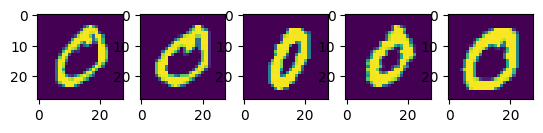

In [17]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()